In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from keras.models import load_model

Read in the data.

In [2]:
test_set = pd.read_csv('test_set_metadata_HMGD.csv')
X_test = np.load('test_set_hmgd_arr.npy')

model_A1 = load_model('regression_epoch_044.hdf5')
model_A2 = load_model('regression_rescaling_epoch_044.hdf5')

Compute predictions and prediction errors.

In [3]:
model_A1_preds = model_A1.predict(255 * X_test).ravel()
model_A2_preds = model_A2.predict(X_test).ravel()
ensemble_preds = (model_A1_preds + model_A2_preds) / 2

print(f"MSE: {((ensemble_preds - test_set['age'].values) ** 2).mean()}")
print(f"MAE: {np.abs(ensemble_preds - test_set['age'].values).mean()}")

# free up memory
del X_test

MSE: 78.19722451416847
MAE: 6.351404863304236


Display visualizations.

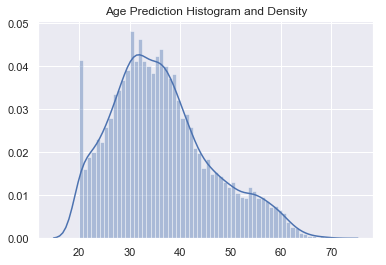

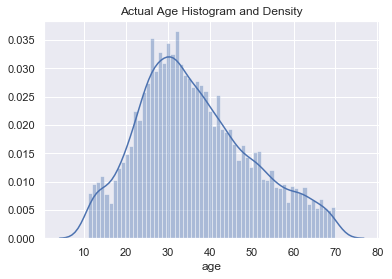

In [4]:
sns.distplot(ensemble_preds, bins=60)
plt.title('Age Prediction Histogram and Density')
plt.show()

sns.distplot(test_set['age'], bins=60)
plt.title('Actual Age Histogram and Density')
plt.show()

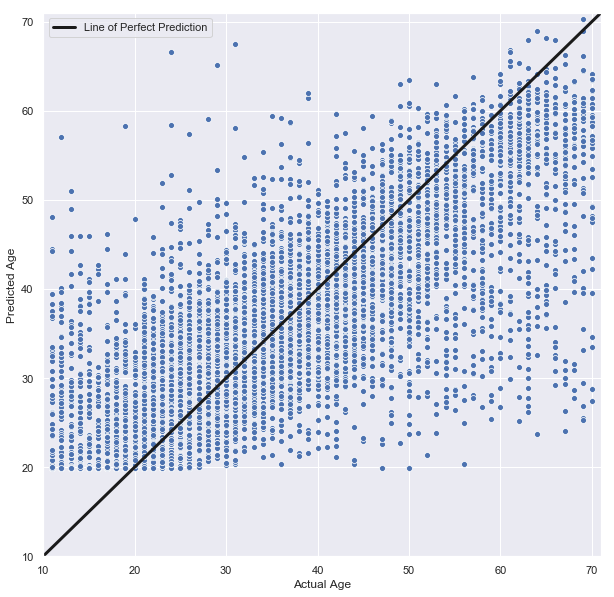

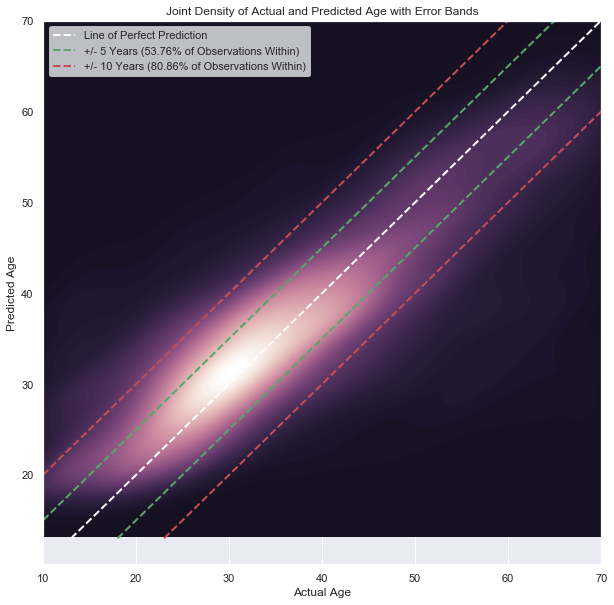

In [5]:
#Scatterplot
plt.figure(figsize=(10, 10))
plt.plot([10, 71], [10, 71], 'k', linewidth=3, label='Line of Perfect Prediction')
sns.scatterplot(test_set['age'].values, ensemble_preds)
plt.xlim((10, 71))
plt.ylim((10, 71))
plt.xlabel('Actual Age')
plt.ylabel('Predicted Age')
plt.legend()
plt.show()


#Density plot with error bands
within_5_years = (np.abs(ensemble_preds - test_set['age'].values) <=5).mean()
within_5_years = np.round(100 * within_5_years, 2)
within_10_years = (np.abs(ensemble_preds - test_set['age'].values) <=10).mean()
within_10_years = np.round(100 * within_10_years, 2)

plt.figure(figsize=(10, 10))
cmap = sns.cubehelix_palette(as_cmap=True, dark=0.075, light=1, reverse=True)
sns.kdeplot(test_set['age'].values, ensemble_preds, cmap=cmap, n_levels=100, shade=True, clip=[(10, 70), (10, 70)])

plt.plot([13, 70], [13, 70], 'w--', linewidth=2, label='Line of Perfect Prediction')
plt.plot([10, 65], [15, 70], 'g--', linewidth=2, label=f'+/- 5 Years ({within_5_years}% of Observations Within)')
plt.plot([18, 70], [13, 65], 'g--', linewidth=2)
plt.plot([10, 60], [20, 70], 'r--', linewidth=2, label=f'+/- 10 Years ({within_10_years}% of Observations Within)')
plt.plot([23, 70], [13, 60], 'r--', linewidth=2)

plt.xlabel('Actual Age')
plt.ylabel('Predicted Age')
plt.legend(loc='upper left')
plt.title('Joint Density of Actual and Predicted Age with Error Bands')
plt.show()